# Technical Interview Study Guide

### Binary Tree Search Problems

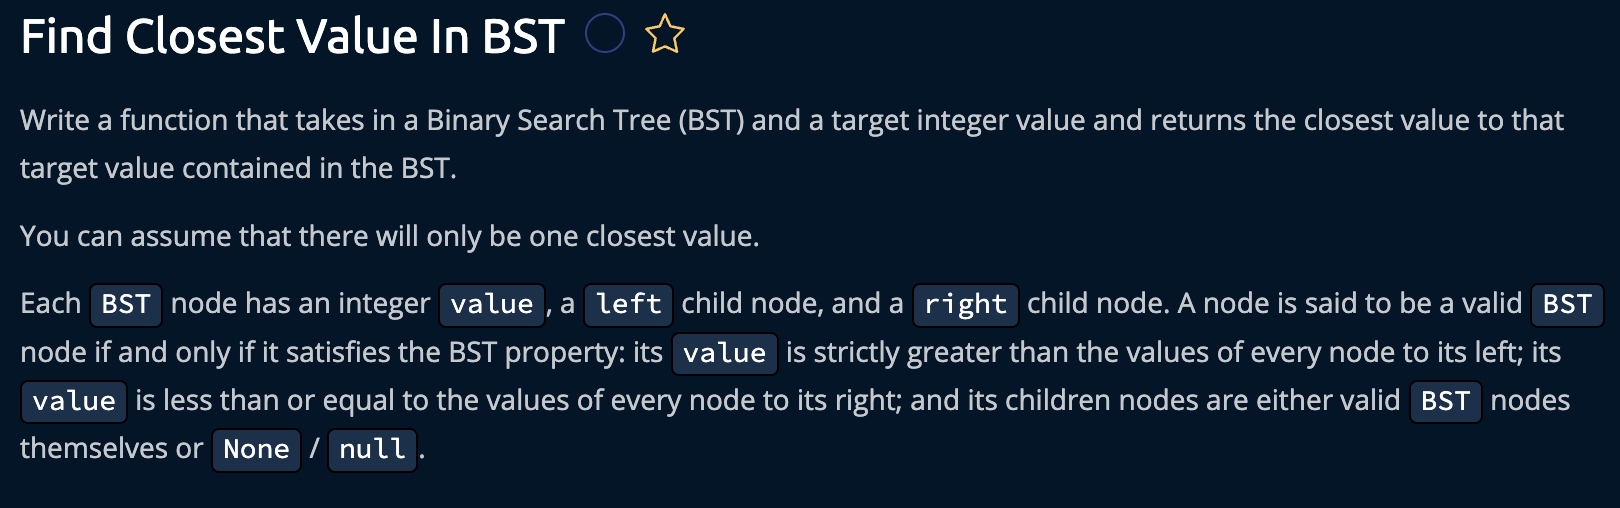

In [2]:
#Recursive Solution

# Time: O(log(n)) | Space: (log(n))
def findClosestValueInBst(tree, target):
    """Take the tree as input
    -- traverse the tree calculating the difference between the target and the integer
    -- collect the difference at every node
    -- compare the differences for the smallest number
    -- return the integer that has the smallest difference"""
    
    return findClosestValueInBstHelper(tree, target, tree.value)

def findClosestValueInBstHelper(tree, target, closest):
    if tree is None: #base case: when recursion is used, you must establish a base case
        return closest
    if abs(target - closest) > abs(target - tree.value):
        closest = tree.value
    if target < tree.value:
        return findClosestValueInBstHelper(tree.left, target, closest)
    elif target > tree.value:
        return findClosestValueInBstHelper(tree.right, target, closest)
    else:
        return closest

# This is the class of the input tree. Do not edit.
class BST:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [ ]:
#Iterative Solution

# Time: O(log(n)) | Space: O(1) 
# Worst Time: O(n) | Worst Space: O(1)
# This is a time when the iterative approach is a more optimal solution than recursion
def findClosestValueInBst(tree, target):
    """
    -- Start on current node
    -- If the absolute value of the target minus closest is greater than abs value of target - current node, the closest is the current node
    -- If the target number is smaller than the current node then the current node should move left
    -- if the targer is greater than the current node value then the current node should move right
    -- Otherwise break and return the closest integer
    """
    
    return findClosestValueInBstHelper(tree, target, float("inf"))

def findClosestValueInBstHelper(tree, target, closest):
    currentNode = tree #in iterationm you need a variable to point to the starting point
    
    
    while currentNode is not None:
        if abs(target - closest) > abs(target - currentNode.value):
            closest = currentNode.value
        if target < currentNode.value:
            currentNode = currentNode.left
        elif target > currentNode.value:
            currentNode = currentNode.right
        else:
            break
    return closest

# This is the class of the input tree. Do not edit.
class BST:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

### Binary Tree Problem

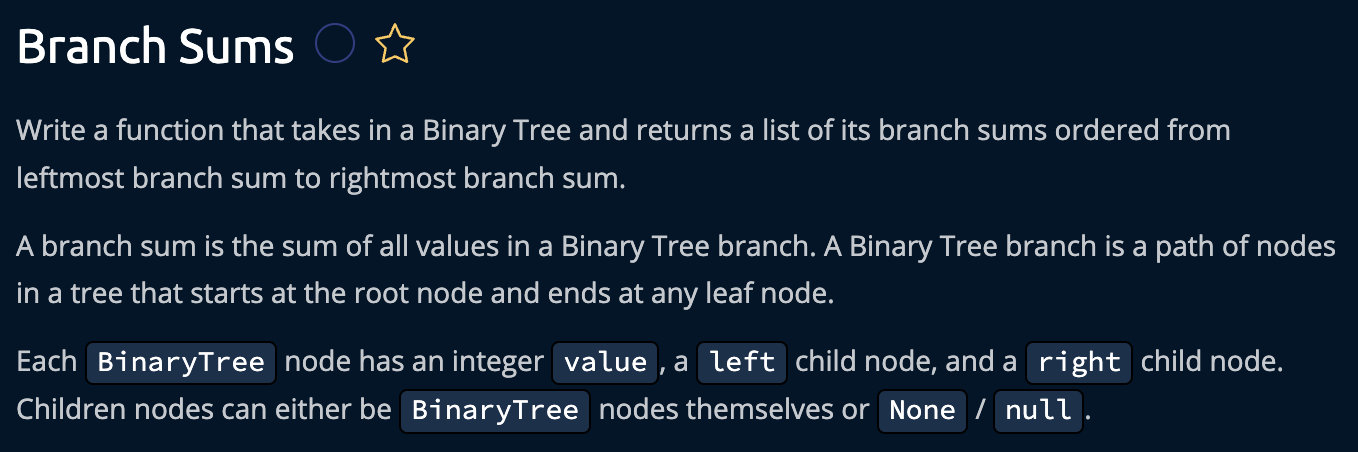

In [ ]:
#Depth First Search / Recursive Solution

# This is the class of the input root. Do not edit it.
class BinaryTree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# O(n) time | O(n) space
def branchSums(root):
    # Write your code here.
	""" Use recursive logic
	-- Keep track of running sum
	-- Every node running sum is equal to all the sums above it
	-- Would want parameter of running sums"""
    
	sums = []
	calculateBranchSums(root, 0, sums)
	return sums

def calculateBranchSums(node, runningSum, sums):
	if node is None: #handles the edge case if there is a left node or right node but not its complement
		return 
	newRunningSum = runningSum + node.value #this calculates the branch sum
	if node.left is None and node.right is None: #if the node is a leaf
		sums.append(newRunningSum) #add sum of the branch to the list
		return
	
	calculateBranchSums(node.left, newRunningSum, sums) #calling on function recursively if the node is not a leaf
	calculateBranchSums(node.right, newRunningSum, sums)

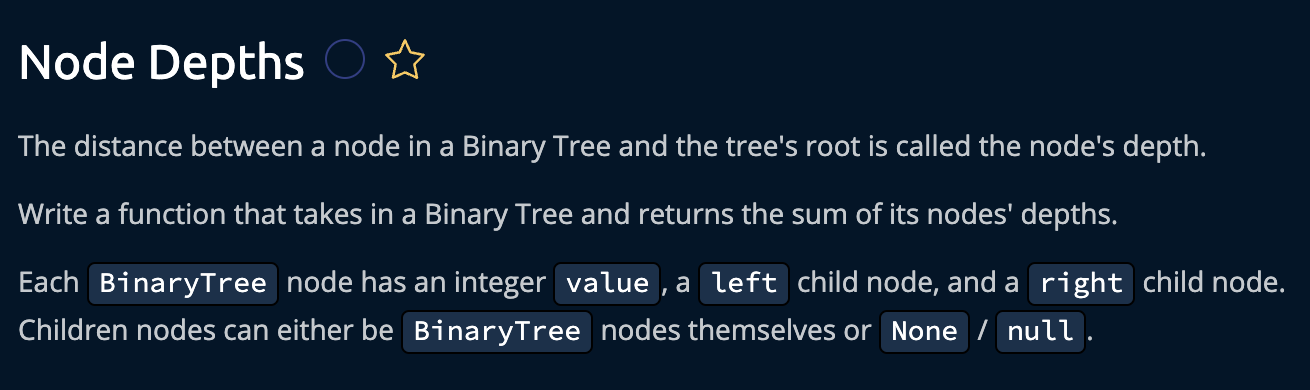

In [ ]:
#Iterative Approach
# Uses a stack to traverse the tree
# O(n) time | O(h) space
def nodeDepths(root):
    # Write your code here.
	depth_sum = 0 #initialize starting point
	stack = [{"node" : root, "depth": 0}] #create stack (LIFO) that stores both node and the corresponding depth from the root
	while len(stack) > 0: #while loop that states while the length of the stack is larger than zero
		nodeInfo = stack.pop() #the node info is the stack with the value of the next node
		node, depth = nodeInfo["node"], nodeInfo["depth"] #the node and depth values are the same as the nodeinfo node and depth values
		if node is None: #if the node is empty, continue through the traversal
			continue
		depth_sum += depth #at each step away from the root, add the depth
		stack.append({"node": node.left, "depth": depth + 1}) #add 1 to the value of the last depth for the left node children
		stack.append({"node": node.right, "depth": depth + 1}) #add 1 to the value of the last depth for the right node children
	return depth_sum #return the depth sum


# This is the class of the input binary tree.
class BinaryTree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [ ]:
#Recursive Approach
# f(n, d) = d + f(l, d+1) + f(r, d +1)
# O(n) time | O(h) space
def nodeDepths(root, depth = 0):
    # Write your code here.
    if root is None: #if the node is empty, return 0
		return 0
	return depth + nodeDepths(root.left, depth + 1) + nodeDepths(root.right, depth + 1) 
#otherwise recusively add 1 to the value of each child node on the left and each child node on the right. When done, end

 # This is the class of the input binary tree.
class BinaryTree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

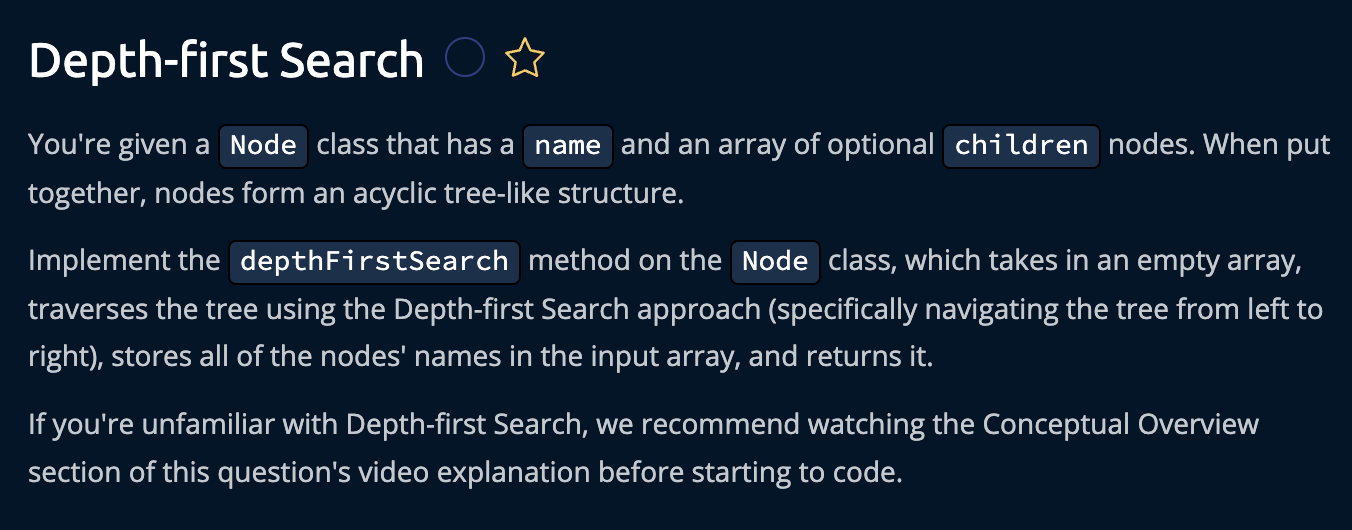

### Graph Problem

In [ ]:
# Recursive Solution using Depth First Search
# Do not edit the class below except
# for the depthFirstSearch method.
# Feel free to add new properties
# and methods to the class.
# O(v + e) time | O(v) space ## where time is the value of vertices plus edges and space is the number of vertices
class Node:
    def __init__(self, name):
        self.children = []
        self.name = name

    def addChild(self, name):
        self.children.append(Node(name))
        return self

    def depthFirstSearch(self, array):
        # Write your code here.
        array.append(self.name) #append the name to the array
		for child in self.children:
			child.depthFirstSearch(array) #for every child in children you call in the array name for the children
		return array

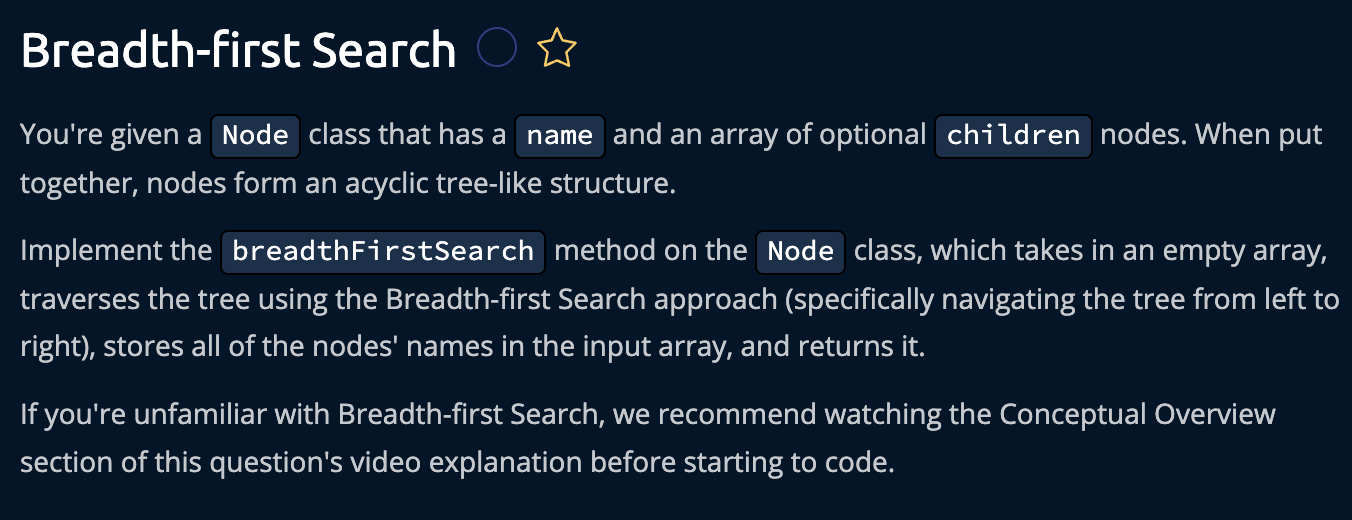

In [ ]:
# Recursive function using Breadth-first search
# Feel free to add new properties
# and methods to the class.
# O(v + e) time | O(v) space
class Node:
    def __init__(self, name):
        self.children = []
        self.name = name

    def addChild(self, name):
        self.children.append(Node(name))
        return self

    def breadthFirstSearch(self, array):
        # Write your code here.
        queue = [self] #pass in the initial node as self
		while len(queue) > 0: #while the queue is not empty
			current = queue.pop(0) #take the value of index 0 and pop it out, set it as current node
			array.append(current.name) #append the final array with the name is the current node
			for child in current.children: #for every child we have in the current node
				queue.append(child) #append the name of the children to the queue
		return array

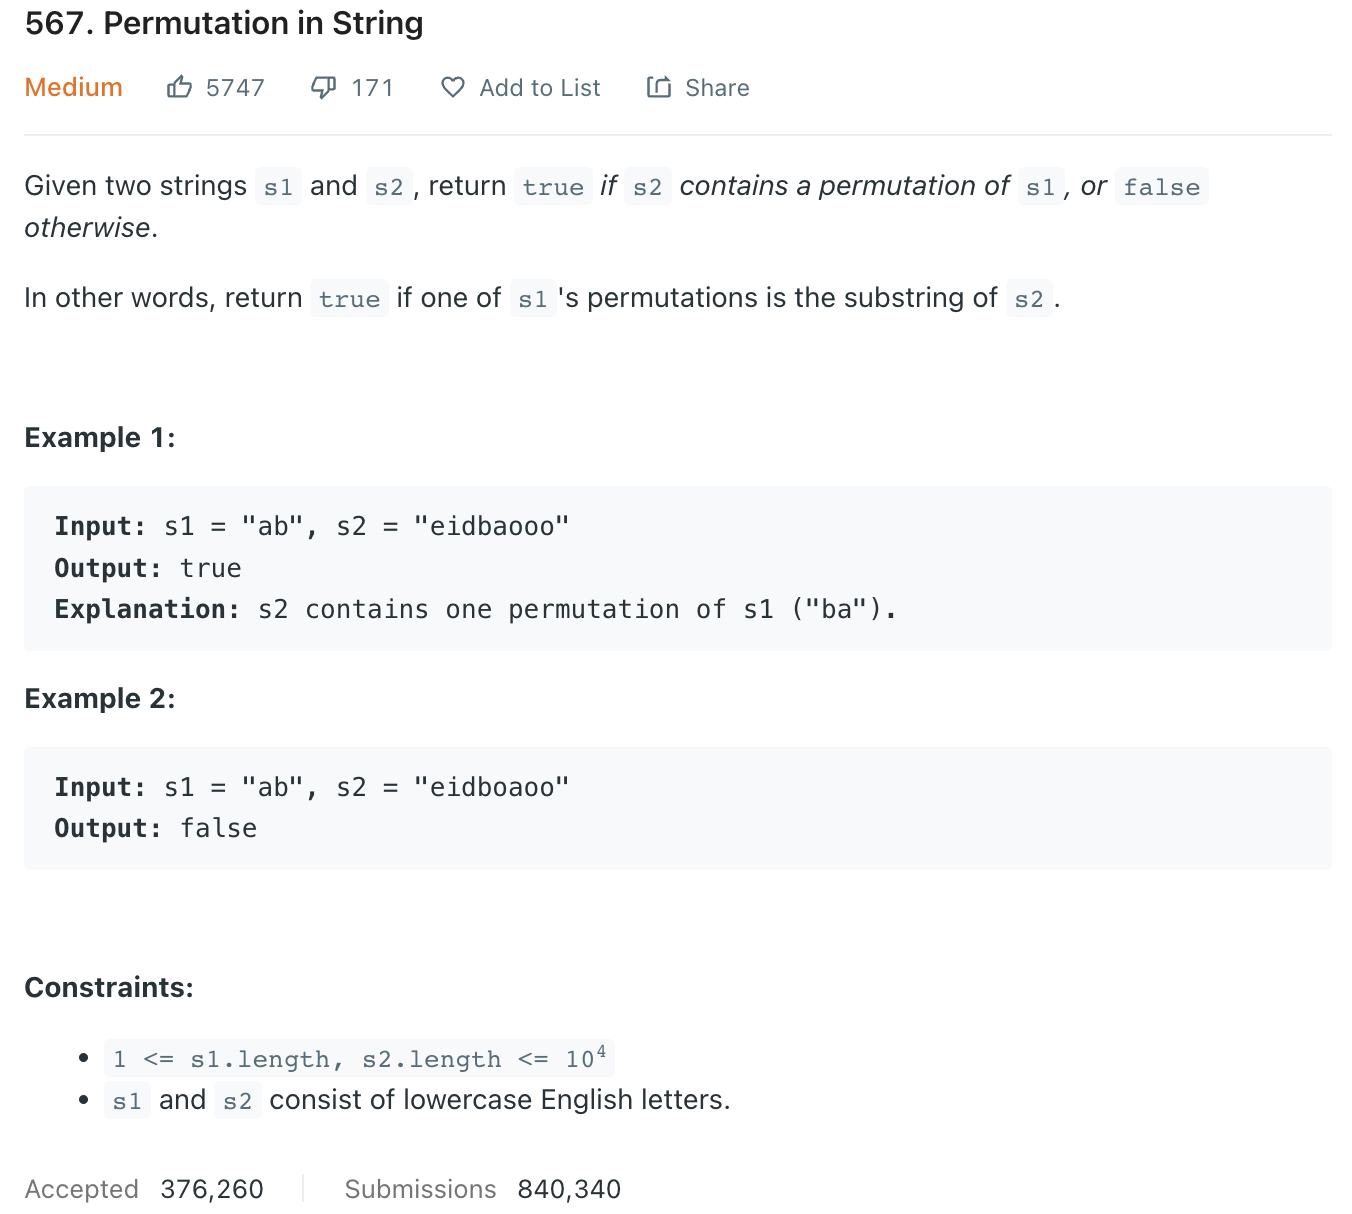

In [ ]:
class Solution:
    #sliding window solution using a hashmap
    def checkInclusion(self, s1: str, s2: str) -> bool:
	    cntr, w = Counter(s1), len(s1)   

	    for i in range(len(s2)):
		    if s2[i] in cntr: 
			    cntr[s2[i]] -= 1
		    if i >= w and s2[i-w] in cntr: 
			    cntr[s2[i-w]] += 1

		    if all([cntr[i] == 0 for i in cntr]):
			    return True

	    return False

*Problem Sources: Leetcode and AlgoExpert